# Overfitting and underfitting


Note: in this notebook we will be using the IMDB test set as our validation set. It doesn't matter in this context.

In [1]:
from tensorflow.keras.datasets import imdb
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\Users\msi-pc\.conda\envs\tf24\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\msi-pc\.conda\envs\tf24\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecat

# Fighting overfitting

## Reducing the network's size

In [2]:
from tensorflow.keras import models
from tensorflow.keras import layers

original_model = models.Sequential()
original_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
original_model.add(layers.Dense(16, activation='relu'))
original_model.add(layers.Dense(1, activation='sigmoid'))

original_model.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['acc'])

Now let's try to replace it with this smaller network:

In [3]:
smaller_model = models.Sequential()
smaller_model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
smaller_model.add(layers.Dense(4, activation='relu'))
smaller_model.add(layers.Dense(1, activation='sigmoid'))

smaller_model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['acc'])


Here's a comparison of the validation losses of the original network and the smaller network. The dots are the validation loss values of 
the smaller network, and the crosses are the initial network (remember: a lower validation loss signals a better model).

In [4]:
original_hist = original_model.fit(x_train, y_train,
                                   epochs=20,
                                   batch_size=512,
                                   validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 4s 57ms/step - loss: 0.5448 - acc: 0.7504 - val_loss: 0.3520 - val_acc: 0.8707
Epoch 2/20
49/49 [==============================] - 1s 24ms/step - loss: 0.2740 - acc: 0.9091 - val_loss: 0.3030 - val_acc: 0.8792
Epoch 3/20
49/49 [==============================] - 1s 25ms/step - loss: 0.2043 - acc: 0.9302 - val_loss: 0.2805 - val_acc: 0.8882
Epoch 4/20
49/49 [==============================] - 1s 25ms/step - loss: 0.1621 - acc: 0.9422 - val_loss: 0.2914 - val_acc: 0.8840
Epoch 5/20
49/49 [==============================] - 1s 23ms/step - loss: 0.1382 - acc: 0.9554 - val_loss: 0.3093 - val_acc: 0.8807
Epoch 6/20
49/49 [==============================] - 1s 23ms/step - loss: 0.1232 - acc: 0.9591 - val_loss: 0.3345 - val_acc: 0.8761
Epoch 7/20
49/49 [==============================] - 1s 23ms/step - loss: 0.1104 - acc: 0.9648 - val_loss: 0.3575 - val_acc: 0.8735
Epoch 8/20
49/49 [==============================] - 1s 24ms/step - loss: 0.0948 - a

In [5]:
smaller_model_hist = smaller_model.fit(x_train, y_train,
                                       epochs=20,
                                       batch_size=512,
                                       validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 3s 46ms/step - loss: 0.5779 - acc: 0.7464 - val_loss: 0.4214 - val_acc: 0.8613
Epoch 2/20
49/49 [==============================] - 1s 24ms/step - loss: 0.3644 - acc: 0.8863 - val_loss: 0.3348 - val_acc: 0.8807
Epoch 3/20
49/49 [==============================] - 1s 24ms/step - loss: 0.2731 - acc: 0.9134 - val_loss: 0.2967 - val_acc: 0.8878
Epoch 4/20
49/49 [==============================] - 1s 25ms/step - loss: 0.2223 - acc: 0.9293 - val_loss: 0.2819 - val_acc: 0.8894
Epoch 5/20
49/49 [==============================] - 1s 24ms/step - loss: 0.1893 - acc: 0.9366 - val_loss: 0.2806 - val_acc: 0.8879
Epoch 6/20
49/49 [==============================] - 1s 24ms/step - loss: 0.1696 - acc: 0.9444 - val_loss: 0.2908 - val_acc: 0.8835
Epoch 7/20
49/49 [==============================] - 1s 24ms/step - loss: 0.1507 - acc: 0.9514 - val_loss: 0.2903 - val_acc: 0.8854
Epoch 8/20
49/49 [==============================] - 1s 24ms/step - loss: 0.1368 - a

In [6]:
epochs = range(1, 21)
original_val_loss = original_hist.history['val_loss']
smaller_model_val_loss = smaller_model_hist.history['val_loss']

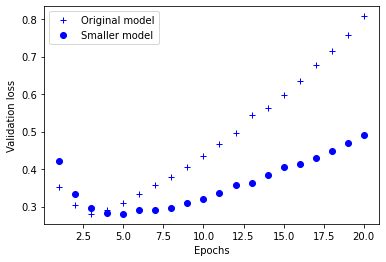

In [7]:
import matplotlib.pyplot as plt

# b+ is for "blue cross"
plt.plot(epochs, original_val_loss, 'b+', label='Original model')
# "bo" is for "blue dot"
plt.plot(epochs, smaller_model_val_loss, 'bo', label='Smaller model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()


6 epochs vs 4 epochs

In [8]:
bigger_model = models.Sequential()
bigger_model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
bigger_model.add(layers.Dense(512, activation='relu'))
bigger_model.add(layers.Dense(1, activation='sigmoid'))

bigger_model.compile(optimizer='rmsprop',
                     loss='binary_crossentropy',
                     metrics=['acc'])

In [12]:
bigger_model_hist = bigger_model.fit(x_train, y_train,
                                     epochs=20,
                                     batch_size=512,
                                     validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 3s - loss: 0.4539 - acc: 0.8011 - val_loss: 0.4150 - val_acc: 0.8229
Epoch 2/20
25000/25000 [==============================] - 3s - loss: 0.2148 - acc: 0.9151 - val_loss: 0.2742 - val_acc: 0.8901
Epoch 3/20
25000/25000 [==============================] - 3s - loss: 0.1217 - acc: 0.9544 - val_loss: 0.5442 - val_acc: 0.7975
Epoch 4/20
25000/25000 [==============================] - 3s - loss: 0.0552 - acc: 0.9835 - val_loss: 0.4316 - val_acc: 0.8842
Epoch 5/20
25000/25000 [==============================] - 3s - loss: 0.0662 - acc: 0.9888 - val_loss: 0.5098 - val_acc: 0.8822
Epoch 6/20
25000/25000 [==============================] - 3s - loss: 0.0017 - acc: 0.9998 - val_loss: 0.6867 - val_acc: 0.8811
Epoch 7/20
25000/25000 [==============================] - 3s - loss: 0.1019 - acc: 0.9882 - val_loss: 0.6737 - val_acc: 0.8800
Epoch 8/20
25000/25000 [==============================] - 3s 

Here's how the bigger network fares compared to the reference one. The dots are the validation loss values of the bigger network, and the 
crosses are the initial network.

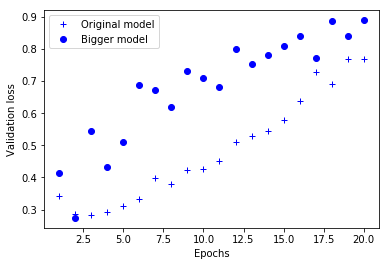

In [26]:
bigger_model_val_loss = bigger_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_val_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

after just 1 epoch, bigger network starts to overfit

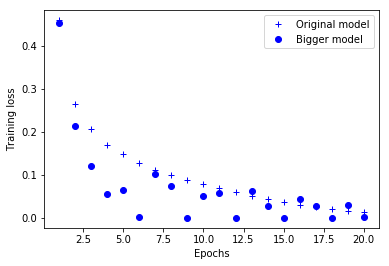

In [28]:
original_train_loss = original_hist.history['loss']
bigger_model_train_loss = bigger_model_hist.history['loss']

plt.plot(epochs, original_train_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_train_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()


As you can see, the bigger network gets its training loss near zero very quickly. The more capacity the network has, the quicker it will be 
able to model the training data (resulting in a low training loss), but the more susceptible it is to overfitting (resulting in a large 
difference between the training and validation loss).

## Adding weight regularization

In [17]:
from tensorflow.keras import regularizers

l2_model = models.Sequential()
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu', input_shape=(10000,)))
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))

In [18]:
l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

In [19]:
l2_model_hist = l2_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 3s - loss: 0.4880 - acc: 0.8218 - val_loss: 0.3820 - val_acc: 0.8798
Epoch 2/20
25000/25000 [==============================] - 2s - loss: 0.3162 - acc: 0.9068 - val_loss: 0.3353 - val_acc: 0.8896
Epoch 3/20
25000/25000 [==============================] - 2s - loss: 0.2742 - acc: 0.9185 - val_loss: 0.3306 - val_acc: 0.8898
Epoch 4/20
25000/25000 [==============================] - 2s - loss: 0.2489 - acc: 0.9288 - val_loss: 0.3363 - val_acc: 0.8866
Epoch 5/20
25000/25000 [==============================] - 2s - loss: 0.2420 - acc: 0.9318 - val_loss: 0.3492 - val_acc: 0.8820
Epoch 6/20
25000/25000 [==============================] - 2s - loss: 0.2322 - acc: 0.9359 - val_loss: 0.3567 - val_acc: 0.8788
Epoch 7/20
25000/25000 [==============================] - 2s - loss: 0.2254 - acc: 0.9385 - val_loss: 0.3632 - val_acc: 0.8787
Epoch 8/20
25000/25000 [==============================] - 2s 

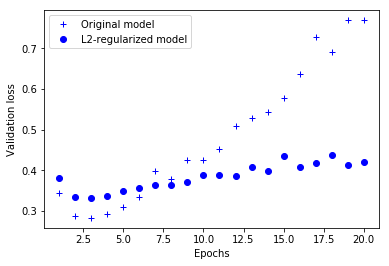

In [30]:
l2_model_val_loss = l2_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l2_model_val_loss, 'bo', label='L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

In [9]:
from tensorflow.keras import regularizers

# L1 regularization
regularizers.l1(0.001)

# L1 and L2 regularization at the same time
regularizers.l1_l2(l1=0.001, l2=0.001)

## Adding dropout

In [ ]:
model.add(layers.Dropout(0.5))

Let's add two `Dropout` layers in our IMDB network to see how well they do at reducing overfitting:

In [12]:
dpt_model = models.Sequential()
dpt_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(16, activation='relu'))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(1, activation='sigmoid'))

dpt_model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['acc'])

In [13]:
dpt_model_hist = dpt_model.fit(x_train, y_train,
                               epochs=20,
                               batch_size=512,
                               validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 3s 42ms/step - loss: 0.6382 - acc: 0.6241 - val_loss: 0.4432 - val_acc: 0.8664
Epoch 2/20
49/49 [==============================] - 1s 29ms/step - loss: 0.4580 - acc: 0.8150 - val_loss: 0.3464 - val_acc: 0.8804
Epoch 3/20
49/49 [==============================] - 1s 28ms/step - loss: 0.3689 - acc: 0.8715 - val_loss: 0.3058 - val_acc: 0.8868
Epoch 4/20
49/49 [==============================] - 1s 27ms/step - loss: 0.3138 - acc: 0.8987 - val_loss: 0.3021 - val_acc: 0.8848
Epoch 5/20
49/49 [==============================] - 1s 27ms/step - loss: 0.2668 - acc: 0.9176 - val_loss: 0.3037 - val_acc: 0.8844
Epoch 6/20
49/49 [==============================] - 1s 27ms/step - loss: 0.2396 - acc: 0.9274 - val_loss: 0.2959 - val_acc: 0.8868
Epoch 7/20
49/49 [==============================] - 1s 27ms/step - loss: 0.2079 - acc: 0.9355 - val_loss: 0.3129 - val_acc: 0.8854
Epoch 8/20
49/49 [==============================] - 1s 26ms/step - loss: 0.1947 - a

Let's plot the results:

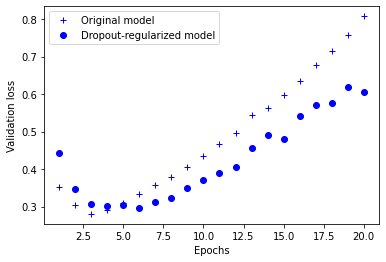

In [14]:
dpt_model_val_loss = dpt_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, dpt_model_val_loss, 'bo', label='Dropout-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Valis')
plt.legend()


Again, a clear improvement over the reference network.

To recap: here the most common ways to prevent overfitting in neural networks:

* Getting more training data.
* Reducing the capacity of the network.
* Adding weight regularization.
* Adding dropout.

## Contact me

### LinkedIn Account
https://www.linkedin.com/in/mohammed-behjoo-446098b7/


### YouTube Channel
https://www.youtube.com/channel/UCudI0gvPh-YbiY2zLM7im-w


### GitHub
https://github.com/mohammedbehjoo